## Task 1

In [184]:
import numpy as np

"""
Given two arrays of Fourier coefficients, synthesizes the periodic signal as a sequence of samples.

:param time_vals: array of values for t
:param a_coeffs: values of a (a_k == a_coeffs[k])
:param b_coeffs: values of b (b_k == b_coeffs[k])
:param T: fundamental period of signal
:returns: array of samples at the positions in time_vals
"""
def fs_synthesize(time_vals: np.ndarray, a_coeffs: np.ndarray, b_coeffs: np.ndarray, T: float) -> np.ndarray:
    assert b_coeffs[0] == 0
    last_k = len(a_coeffs) - 1

    # a0 needs to be divided by 2
    a_coeffs = a_coeffs.copy()
    a_coeffs[0] /= 2

    ret = np.zeros(len(time_vals))
    for idx, t in enumerate(time_vals):
        sin_args = np.linspace(0, (2 * np.pi * last_k * t) / T, num=last_k + 1)
        ret[idx] = np.dot(a_coeffs, np.cos(sin_args)) + np.dot(b_coeffs, np.sin(sin_args))
    return ret

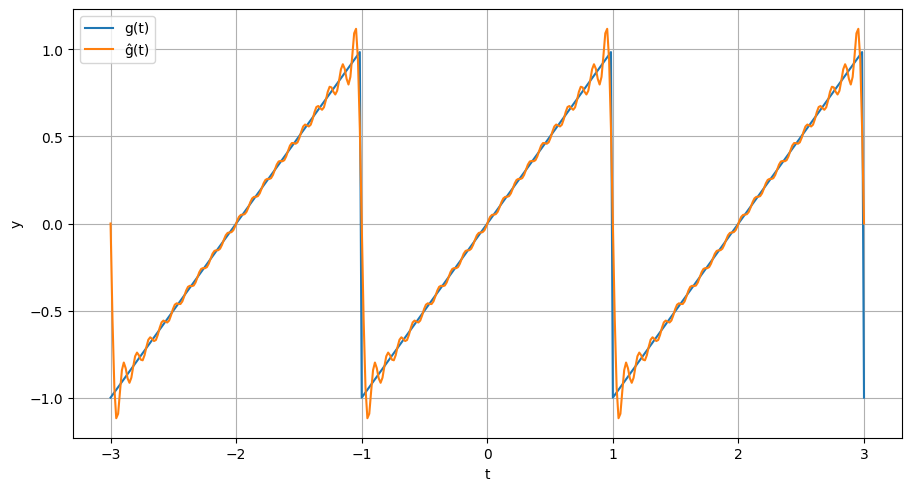

In [185]:
#%matplotlib widget
import matplotlib.pyplot as plt

def plot(t, y, title, xlabel="t", *args, **kwargs):
    plt.plot(t, y, *args, **kwargs)
    #plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("y")
    plt.gcf()

t_vals = np.linspace(-3, 3, num=400)
T = 2
g_vals = (t_vals + 1) % T - 1

fs_len = 20
g_a_coeffs = np.zeros(fs_len)
k_vals = np.arange(1, fs_len)
g_b_coeffs = np.concat([np.zeros(1), -2 * np.cos(np.pi * k_vals) / (np.pi * k_vals)])
g_reconstructed = fs_synthesize(t_vals, g_a_coeffs, g_b_coeffs, T)

plt.figure(constrained_layout=True).set_figwidth(9)
plot(t_vals, g_vals, "Sawtooth wave")
plot(t_vals, g_reconstructed, "Sawtooth wave")
plt.legend(["g(t)", "ĝ(t)"])
plt.grid()

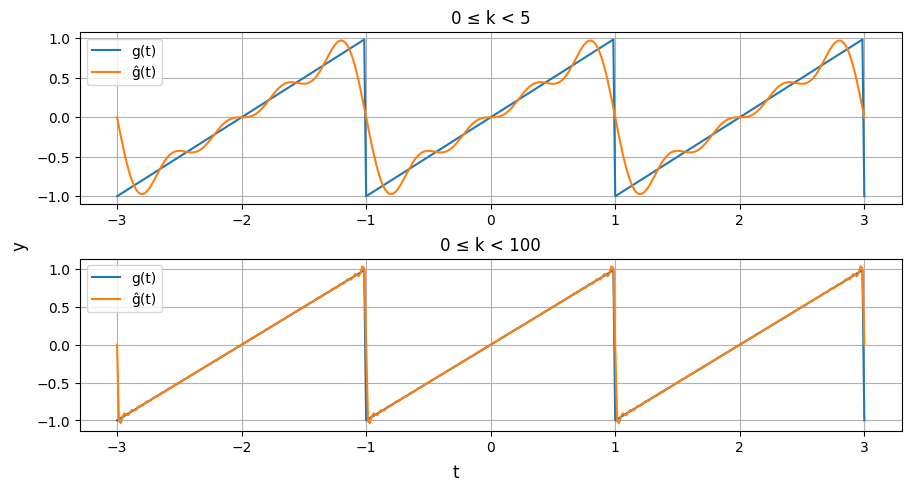

In [186]:
fig, axs = plt.subplots(nrows=2, constrained_layout=True)
fig.supxlabel("t")
fig.supylabel("y")
fig.set_figwidth(9)
for ax, fs_len in zip(axs, (5, 100)):
    alt_g_a_coeffs = np.zeros(fs_len)
    alt_k_vals = np.arange(1, fs_len)
    alt_g_b_coeffs = np.concat([np.zeros(1), -2 * np.cos(np.pi * alt_k_vals) / (np.pi * alt_k_vals)])
    alt_g_reconstructed = fs_synthesize(t_vals, alt_g_a_coeffs, alt_g_b_coeffs, T)

    ax.title.set_text(f"0 ≤ k < {fs_len}")
    ax.plot(t_vals, g_vals)
    ax.plot(t_vals, alt_g_reconstructed)
    ax.legend(["g(t)", "ĝ(t)"])
    ax.grid()

The inaccuracies become smaller with a larger number of $a$ and $b$ coefficients.

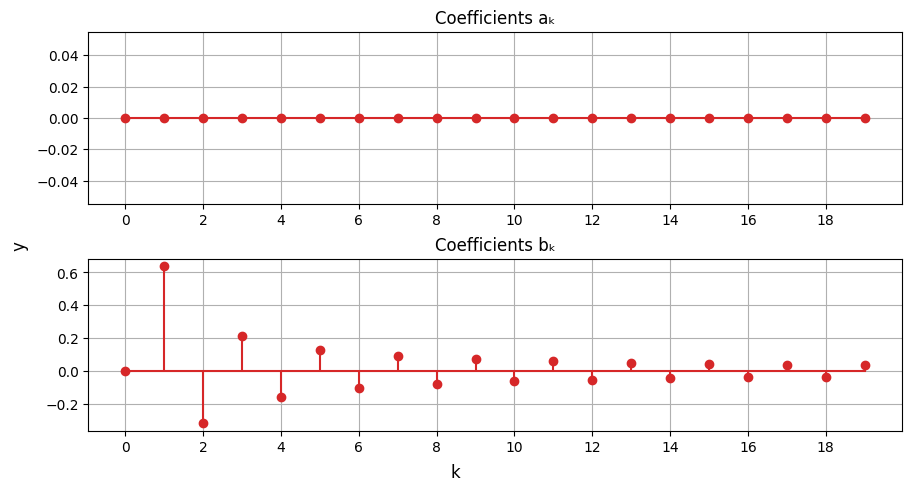

In [187]:
from matplotlib.ticker import MultipleLocator

def plot_coeffs(a_coeffs, b_coeffs, width=9):
    fig, (ax1, ax2) = plt.subplots(nrows=2, constrained_layout=True)
    fig.supxlabel("k")
    fig.supylabel("y")
    fig.set_figwidth(width)

    ax1.title.set_text("Coefficients aₖ")
    ax1.xaxis.set_major_locator(MultipleLocator(2))
    ax1.stem(a_coeffs, linefmt="tab:red")
    ax1.grid()
    ax2.title.set_text("Coefficients bₖ")
    ax2.xaxis.set_major_locator(MultipleLocator(2))
    ax2.stem(b_coeffs, linefmt="tab:red")
    ax2.grid()

plot_coeffs(g_a_coeffs, g_b_coeffs)

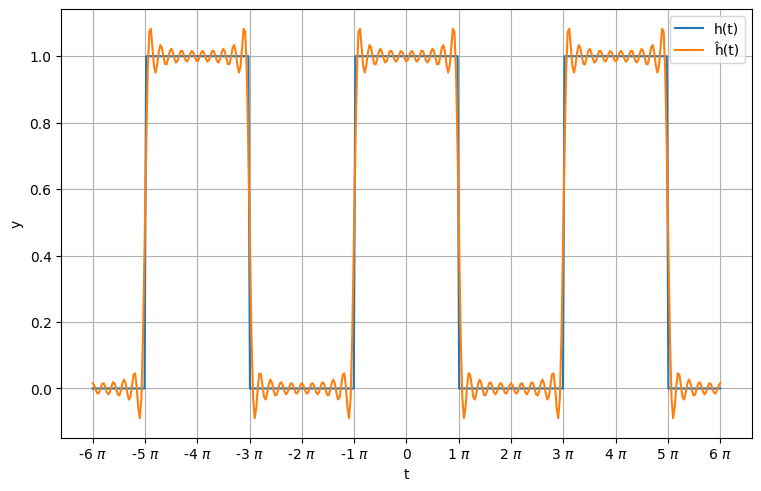

In [188]:
from matplotlib.ticker import FuncFormatter, MultipleLocator

t_vals = np.linspace(-6 * np.pi, 6 * np.pi, num=400)
T = 4 * np.pi
h_vals = 1 - np.floor((t_vals + np.pi) % T * 2 / T)

fs_len = 20
k_vals = np.arange(1, fs_len)
h_a_coeffs = np.concat([np.array([1]), 2 * np.sin(np.pi * k_vals / 2) / (np.pi * k_vals)])
h_b_coeffs = np.zeros(fs_len)
h_reconstructed = fs_synthesize(t_vals, h_a_coeffs, h_b_coeffs, T)

plt.figure(constrained_layout=True).set_figwidth(7.5)
plot(t_vals, h_vals, "Rectangle function")
plot(t_vals, h_reconstructed, "Rectangle function")
plt.legend(["h(t)", "ĥ(t)"])
plt.gca().xaxis.set_major_formatter(FuncFormatter(
   lambda val, _: "{:.0g} $\\pi$".format(val/np.pi) if val != 0 else "0"
))
plt.gca().xaxis.set_major_locator(MultipleLocator(base=np.pi))
plt.grid()

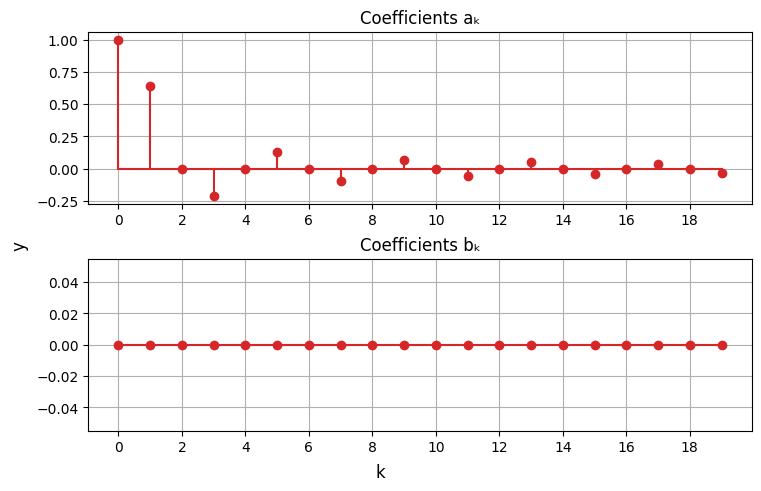

In [189]:
plot_coeffs(h_a_coeffs, h_b_coeffs, width=7.5)

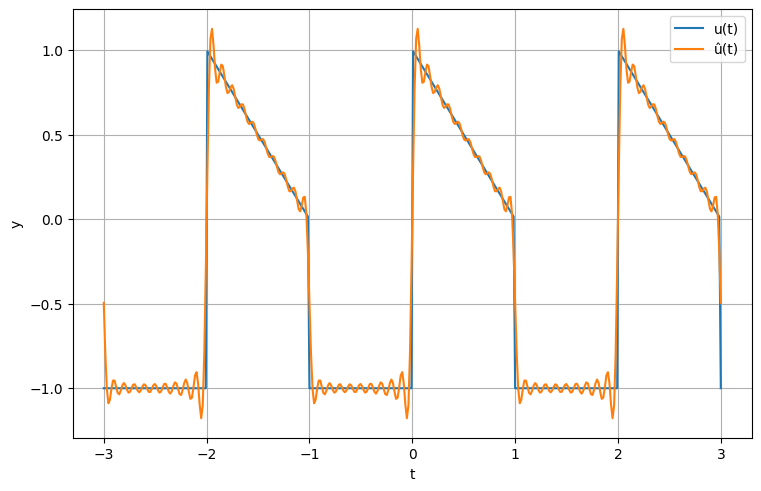

In [190]:
t_vals = np.linspace(-3, 3, num=400)
T = 2
u_vals = np.where(t_vals % T < 1, 1 - t_vals % T, -1)

fs_len = 20
k_vals = np.arange(1, fs_len)
u_a_coeffs = np.concat([np.array([-0.5]), (1 - np.cos(np.pi * k_vals)) / (np.pi * np.pi * k_vals * k_vals)])
u_b_coeffs = np.concat([np.zeros(1), (2 - np.cos(np.pi * k_vals)) / (np.pi * k_vals)])
u_reconstructed = fs_synthesize(t_vals, u_a_coeffs, u_b_coeffs, T)

plt.figure(constrained_layout=True).set_figwidth(7.5)
plot(t_vals, u_vals, "Sawtooth and rectangle combination")
plot(t_vals, u_reconstructed, "Sawtooth and rectangle combination")
plt.legend(["u(t)", "û(t)"])
plt.grid()

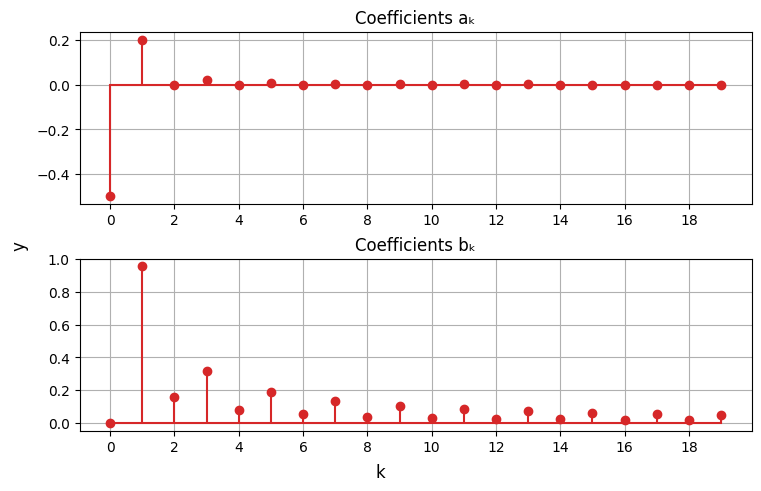

In [191]:
plot_coeffs(u_a_coeffs, u_b_coeffs, width=7.5)

_Explain the meaning of the $a_k$ and $b_k$ coefficients using suitable plots. Is it possible to see properties of the synthesized function based on just the coefficient vectors?_

First and foremost, all of our series of coefficients converge to 0. That means that subsequent sine or cosine terms are of diminishing importance. That tells us that the analyzed signal is in fact periodic – after all, it can be approximated well with a finite number of sine and cosine terms added together.

What we can also see is that sometimes, one of the two coefficient vectors happens to consist entirely of zeros, but we can still synthesize the original function. With the rectangle function $h$, it is easy to explain why only the $a_k$ matter: The rectangle function we were given looks just like a cosine except with right angles instead of a smooth curve.

Similarly, for the sawtooth wave, we can see a resemblance to the sine function. Crucially, it passes through the point $(0,0)$ just like sine.

Q: _How can we choose the coefficients to get a sine wave of frequency 5 Hz?_ \
A: The function needs to equal $x(t) = \sin(2 \pi \cdot 5 t)$. All values $a_k$ will need to be 0 for that. The equation we get is:

\begin{align*}
x(t) = \sin(2 \pi \cdot 5 t) = 1 \cdot \sin\left(\frac{2 \pi k t}{T}\right)
\end{align*}

Now we need to figure out which coefficient that is, i.e. find $k$.

\begin{align*}
2 \pi \cdot 5 t &= \frac{2 \pi k t}{T} \\
5 &= \frac{k}{T} \\
5T &= k
\end{align*}

Result: All values $b_k$ should be zero, except for $b_{5T}$, which should be one.

## Task 2

In [192]:
"""
Computes the discrete Fourier transform of the sampled real signal.

:param sample_vals: array of sample values
:returns: array of DFT coefficients
"""
def dft(sample_vals: np.ndarray) -> np.ndarray:
    N = len(sample_vals)
    # values n/N for all n
    n_N_vals = np.linspace(0, 1, num=N, endpoint=False)

    coeffs = np.zeros(N, dtype=np.complex128)
    for k in range(N):
        coeffs[k] = np.dot(sample_vals, np.exp(-2j * np.pi * k * n_N_vals))

    return coeffs

"""
Computes the original real signal of the complex Fourier coefficients (inverse DFT).

:param coeffs: array of DFT coefficients
:returns: array of sample values
"""
def idft(coeffs: np.ndarray) -> np.ndarray:
    N = len(coeffs)
    # values k/N for all k
    k_N_vals = np.linspace(0, 1, num=N, endpoint=False)

    sample_vals = np.zeros(N)
    for n in range(N):
        sample_vals[n] = np.real(np.dot(coeffs, np.exp(2j * np.pi * n * k_N_vals))) / N

    return sample_vals

(our DFT vs FFT) mean absolute error: 4.957247523018467e-12
(our DFT vs FFT) largest error: 2.0923978662316033e-11
(our IDFT vs IFFT) mean absolute error: 4.430813345528655e-13
(our IDFT vs IFFT) largest error: 1.4168702277834508e-12
(our IDFT vs original) mean absolute error: 3.591793529267306e-13
(our IDFT vs original) largest error: 1.4210854715202004e-12


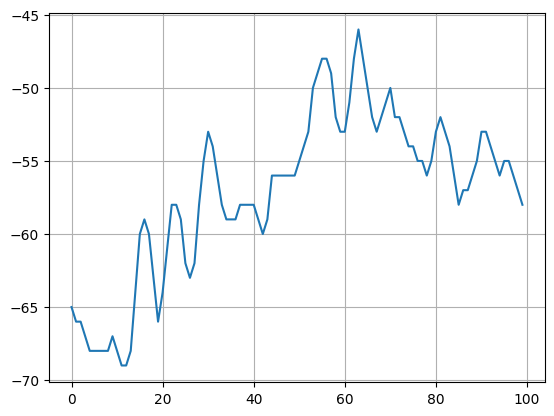

In [193]:
import soundfile as sf

all_sample_vals, sample_rate = sf.read("media/00252_4.9dB_PCM16.wav", dtype="int16")
# Only use a small range for testing purposes
sample_vals = all_sample_vals[29400:29500]

dft_coeffs = dft(sample_vals)
dft_coeffs_fft = np.fft.fft(sample_vals)
print("(our DFT vs FFT) mean absolute error:", np.mean(np.abs(dft_coeffs_fft - dft_coeffs)))
print("(our DFT vs FFT) largest error:", np.max(np.abs(dft_coeffs_fft - dft_coeffs)))

reconstructed = idft(dft_coeffs)
reconstructed_ifft = np.fft.ifft(dft_coeffs)

print("(our IDFT vs IFFT) mean absolute error:", np.mean(np.abs(reconstructed_ifft - reconstructed)))
print("(our IDFT vs IFFT) largest error:", np.max(np.abs(reconstructed_ifft - reconstructed)))

print("(our IDFT vs original) mean absolute error:", np.mean(np.abs(sample_vals - reconstructed)))
print("(our IDFT vs original) largest error:", np.max(np.abs(sample_vals - reconstructed)))

x_axis = np.arange(len(sample_vals))

plt.figure()
plt.plot(x_axis, sample_vals)
#plt.plot(x_axis, reconstructed)
#plt.plot(x_axis, reconstructed_ifft)
plt.grid()

The two reconstructed signals and the original signal all look identical in the graph. The numerical error is very small. FFT and IFFT also provide almost exactly the same values.

In [194]:
import time

sample_vals = all_sample_vals[29400:100000]

sizes = [2**(2**p) for p in range(1, 5)]

def do_runtime_comparison():
    for N in sizes:
        x = sample_vals[:N]

        start = time.perf_counter()
        dft(x)
        end = time.perf_counter()
        dft_time = end - start

        start = time.perf_counter()
        np.fft.fft(x)
        end = time.perf_counter()
        fft_time = end - start

        print(f"N: {N:5d} | DFT: {dft_time:.6f}s | FFT: {fft_time:.6f}s")

#do_runtime_comparison()

Results:
```txt
N:     4 | DFT:  0.000086s | FFT: 0.000024s
N:    16 | DFT:  0.000107s | FFT: 0.000014s
N:   256 | DFT:  0.003539s | FFT: 0.000041s
N: 65536 | DFT: 57.751912s | FFT: 0.000774s
```

The FFT algorithm is in $\Theta(N \log(N))$. Our algorithm has two nested loops, the length of which is $N$ in both cases. (One of those two loops hides in the various numpy shorthands that were used and in `np.dot`.) So our algorithm is in $\Theta(N^2)$.

## Task 3

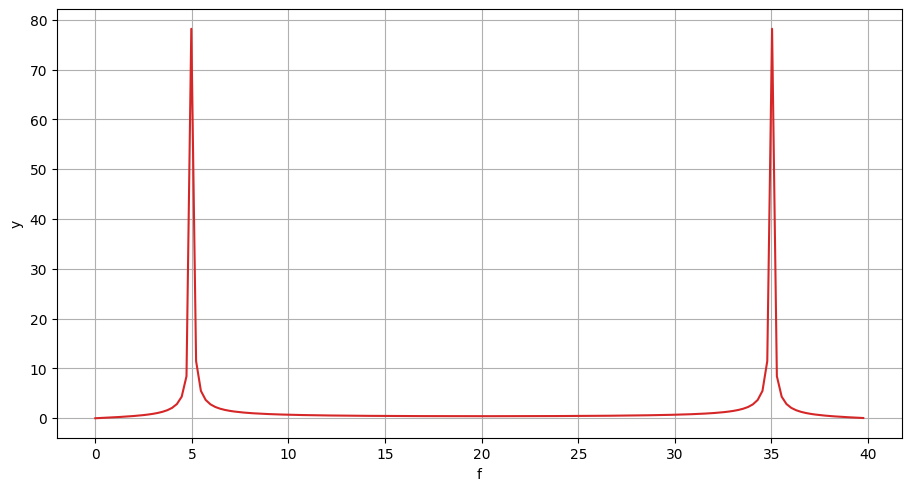

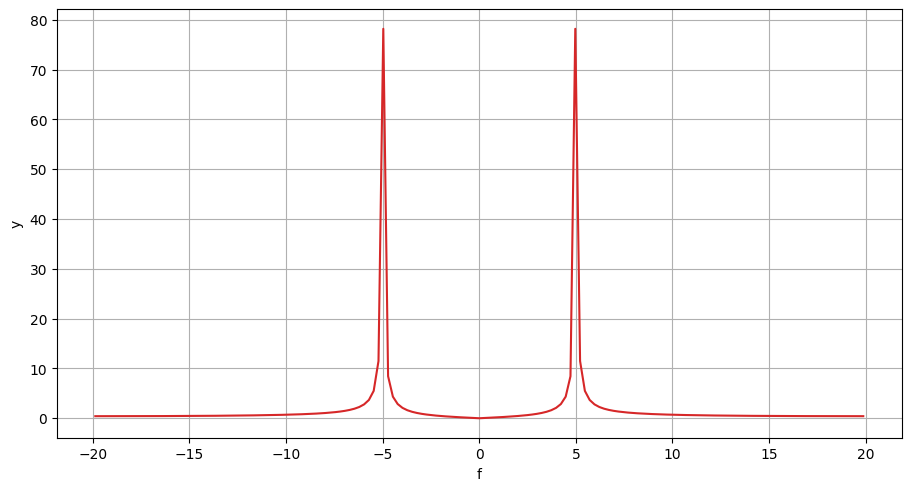

In [195]:
def dftfreq(N: int, fs: int) -> np.ndarray:
    return np.arange(N) * (fs / N)

fs = 40
N = 4 * fs + 1
t_vals = np.linspace(-2, 2, num=N)
f = 5
sin_vals = np.sin(2 * np.pi * f * t_vals)
coeffs = dft(sin_vals)

plt.figure(constrained_layout=True).set_figwidth(9)
plot(dftfreq(N, fs), np.abs(coeffs), "DFT coefficients of sine wave", "f", "tab:red")
plt.grid()

plt.figure(constrained_layout=True).set_figwidth(9)
freqs = np.fft.fftfreq(N, 1 / fs)
plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(coeffs)), "DFT coefficients of sine wave", "f", "tab:red")
plt.grid()

Q: _What does `np.fft.fftshift` do?_ \
A: It shifts the right half of the values all the way to the start of the array, similarly to how signed integers are represented in computers.

Q: _Were you expecting to see two peaks?_ \
A: Yes. The DFT uses exponentiation of complex numbers. To create a sine wave using complex exponents, we need to recall that
\begin{align*}
\sin(x) = \frac{1}{2}j e^{-jx} - \frac{1}{2}j e^{jx}
\end{align*}
Two peaks are necessary to account for these two terms.

_Show that_ $\sin(\omega t) = 1/(2j) \cdot (\exp(j \omega t) - \exp(−j \omega t))$.

\begin{align*}
\exp(j 2\pi ft) &= \cos(2\pi ft) + j \sin(2\pi ft) \\
\exp(j \omega t) &= \cos(\omega t) + j \sin(\omega t) \\
\exp(j \omega t) - \exp(-j \omega t) &= (\cos(\omega t) + j \sin(\omega t)) - (\cos(-\omega t) + j \sin(-\omega t)) \\
\end{align*}
The two cosine terms cancel out since $\cos(\omega t) = \cos(-\omega t)$. Also note that $\sin(\omega t) = -\sin(-\omega t)$:

\begin{align*}
\exp(j \omega t) - \exp(-j \omega t) &= j \sin(\omega t) - j \sin(-\omega t) \\
\exp(j \omega t) - \exp(-j \omega t) &= 2j \sin(\omega t) \\
\frac{1}{2j} (\exp(j \omega t) - \exp(-j \omega t)) &= \sin(\omega t) \\
\end{align*}

That equation can be trivially transformed into the one used for the above explanation on the two peaks. Note that $1/(2j) = -1/2 \cdot j$.

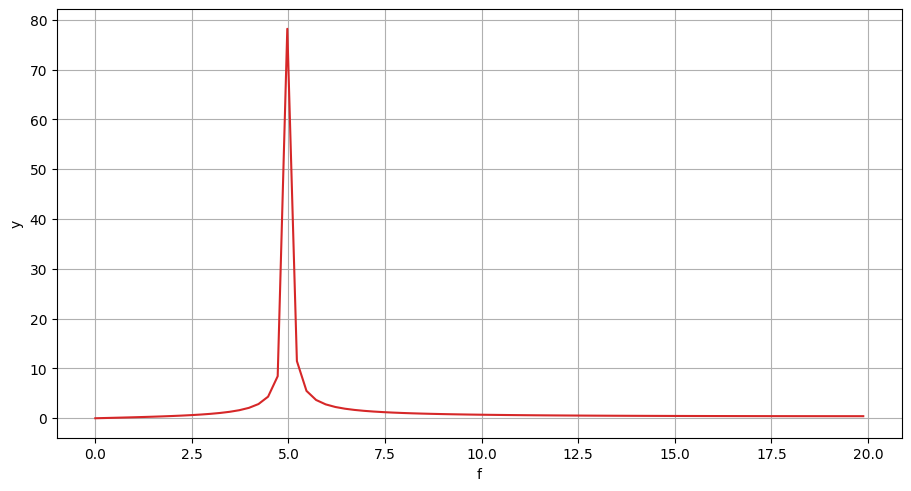

In [196]:
freqs = np.fft.rfftfreq(N, 1 / fs)

plt.figure(constrained_layout=True).set_figwidth(9)
plot(freqs, np.abs(np.fft.rfft(sin_vals)), "Half of DFT coefficients of sine wave", "f", "tab:red")
plt.grid()

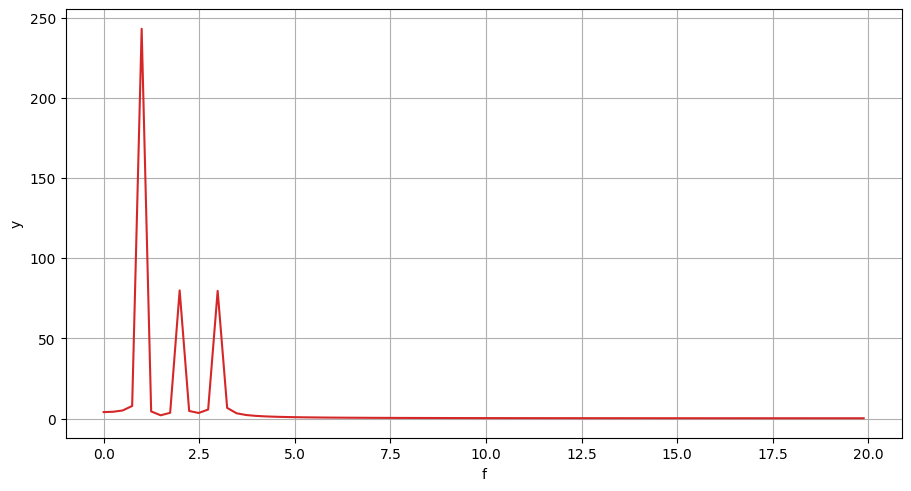

In [197]:
def signal_vals(t_vals):
    return (
        3 * np.cos(2 * np.pi * t_vals)
            + np.sin(2 * np.pi * 2 * t_vals)
            + np.cos(2 * np.pi * 3 * t_vals)
    )

fs = 40
N = 4 * fs + 1
t_vals = np.linspace(-2, 2, num=N)
compound_vals = signal_vals(t_vals)

freqs = np.fft.rfftfreq(N, 1 / fs)

plt.figure(constrained_layout=True).set_figwidth(9)
plot(freqs, np.abs(np.fft.rfft(compound_vals)), "Half of DFT coefficients of compound sine wave", "f", "tab:red")
plt.grid()

The graph matches our expectations. The peaks are at 1 Hz, 2 Hz and 3 Hz, respectively. The strongest term is the one at 1 Hz because it has a coefficient 3 times as large as the other terms.

## Task 4

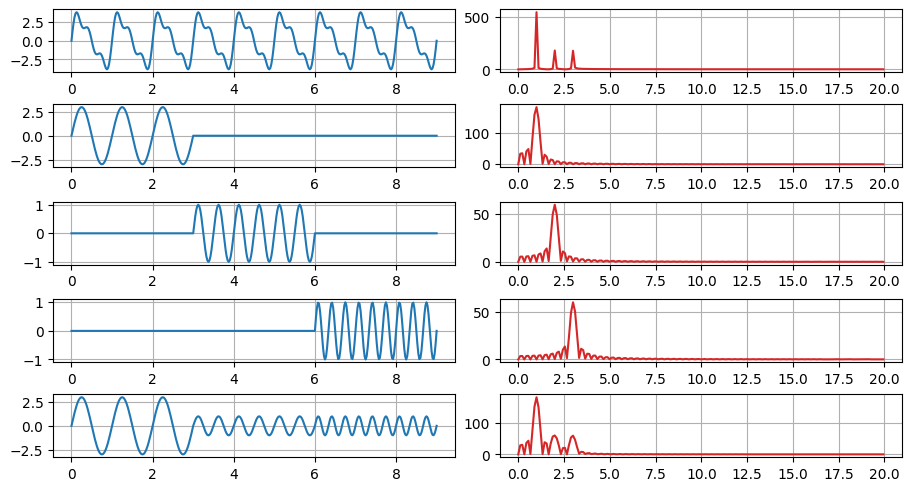

In [198]:
def s1_vals(t_vals):
    return (
        3 * np.sin(2 * np.pi * t_vals)
            + np.sin(2 * np.pi * 2 * t_vals)
            + np.sin(2 * np.pi * 3 * t_vals)
    )
def sa_vals(t_vals):
    return np.where((0 <= t_vals) & (t_vals < 3), 3 * np.sin(2 * np.pi * t_vals), 0)
def sb_vals(t_vals):
    return np.where((3 <= t_vals) & (t_vals < 6), np.sin(2 * np.pi * 2 * t_vals), 0)
def sc_vals(t_vals):
    return np.where((6 <= t_vals) & (t_vals < 9), np.sin(2 * np.pi * 3 * t_vals), 0)
def s2_vals(t_vals):
    return sa_vals(t_vals) + sb_vals(t_vals) + sc_vals(t_vals)

funcs = (s1_vals, sa_vals, sb_vals, sc_vals, s2_vals)

fs = 40
N = 9 * fs + 1
t_vals = np.linspace(0, 9, num=N)

freqs = np.fft.rfftfreq(N, 1 / fs)

fig, (ax_mat) = plt.subplots(nrows=5, ncols=2, constrained_layout=True)
fig.set_figwidth(9)
for idx, axes in enumerate(ax_mat):
    vals = funcs[idx](t_vals)
    axes[0].plot(t_vals, vals)
    axes[0].grid()
    axes[1].plot(freqs, np.abs(np.fft.rfft(vals)), "tab:red")
    axes[1].grid()

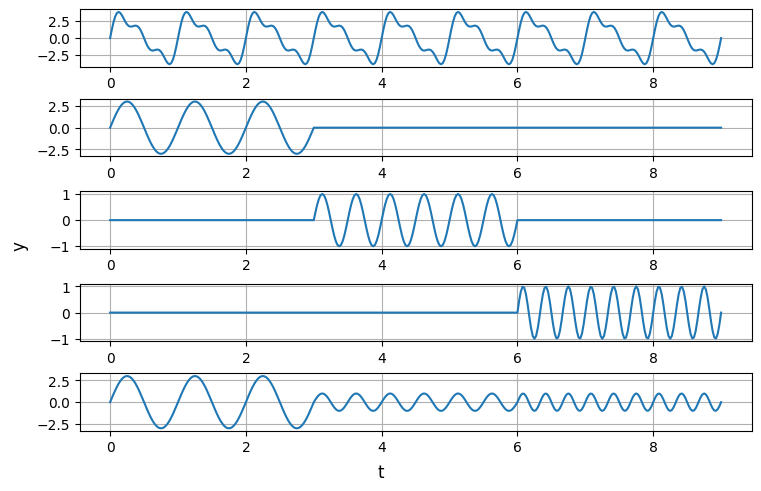

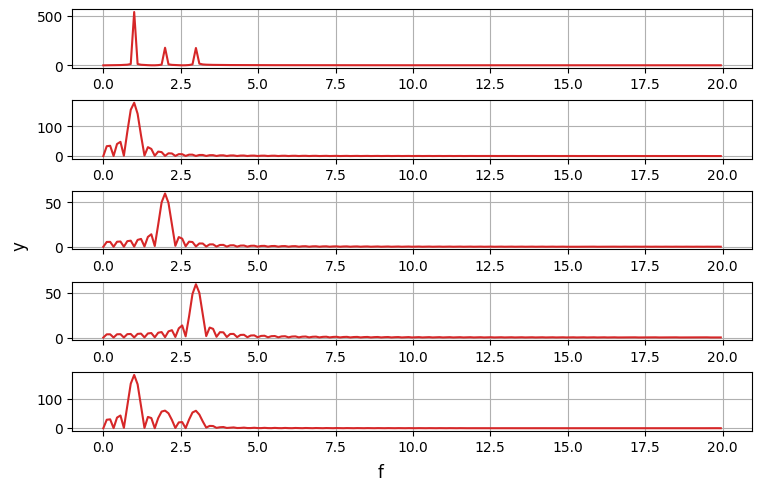

In [199]:
fig, (axs) = plt.subplots(nrows=5, constrained_layout=True)
fig.supxlabel("t")
fig.supylabel("y")
fig.set_figwidth(7.5)
for idx, ax in enumerate(axs):
    vals = funcs[idx](t_vals)
    ax.plot(t_vals, vals)
    ax.grid()

fig, (axs) = plt.subplots(nrows=5, constrained_layout=True)
fig.supxlabel("f")
fig.supylabel("y")
fig.set_figwidth(7.5)
for idx, ax in enumerate(axs):
    vals = funcs[idx](t_vals)
    ax.plot(freqs, np.abs(np.fft.rfft(vals)), "tab:red")
    ax.grid()

When it comes to the signals that are conditionally zero, we didn't know what to expect. As a result, we also did not know what to expect for $s_2$. $s_1$, however, matches the expectation exactly. It has three peaks and all the other values are close to 0.

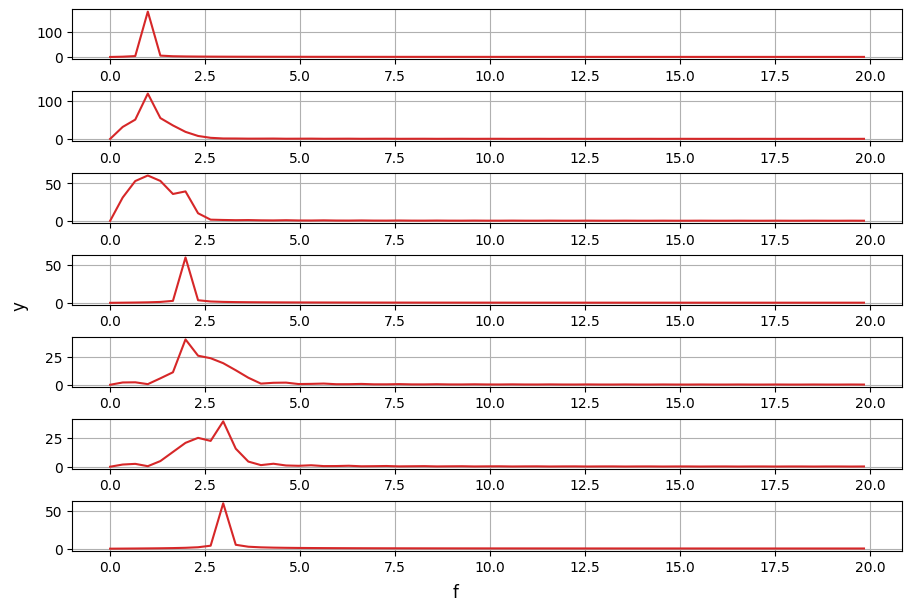

In [200]:
fs = 40
N = 3 * fs + 1

freqs = np.fft.rfftfreq(N, 1 / fs)

fig, (ax_mat) = plt.subplots(nrows=7, constrained_layout=True)
fig.supxlabel("f")
fig.supylabel("y")
fig.set_figwidth(9)
fig.set_figheight(6)
for idx, ax in enumerate(ax_mat):
    t_vals = np.linspace(idx, idx + 3, num=N)
    vals = s2_vals(t_vals)
    ax.plot(freqs, np.abs(np.fft.rfft(vals)), "tab:red")
    ax.grid()

The graphs of the DFTs on the intervals $[0, 3]$, $[3, 6]$ and $[6, 9]$ all look simple with only one peak each. The other graphs are more complicated. They have several spots that are non-zero, but only two of those spots have a large absolute value that make them stand out. However, all graphs are significantly simpler than the one we previously looked at for the DFT of $s_2$.

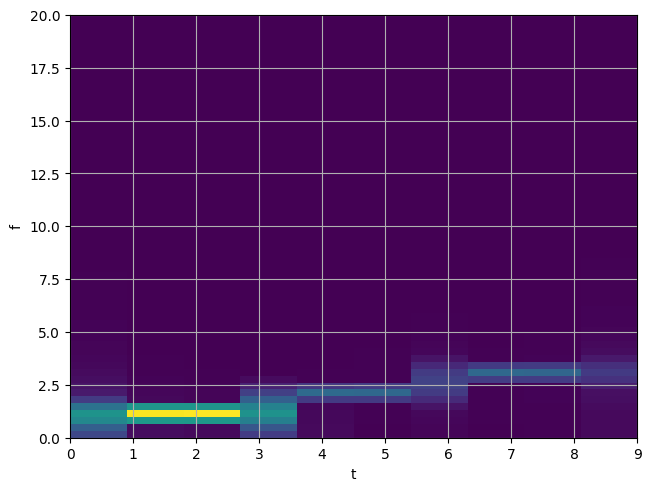

In [201]:
import scipy.signal

fs = 40
N = 9 * fs + 1
t_vals = np.linspace(0, 9, num=N)

f, t, Zxx = scipy.signal.stft(s2_vals(t_vals), fs, nperseg=fs * 3, noverlap=fs * 2, padded=False)

plt.figure(constrained_layout=True)
plt.imshow(np.abs(Zxx), aspect="auto", origin="lower", extent=(t[0], t[-1], f[0], f[-1]))
plt.xlabel("t")
plt.ylabel("f")
plt.grid()

The color at a given point represents the absolute value of the coefficient at that frequency (y axis) in a specific STFT window (x axis).

In other words, what was previously the x axis became the new y axis and what was previously the y axis became color. It is easy to see the similarity to our previous plots.

## Task 5

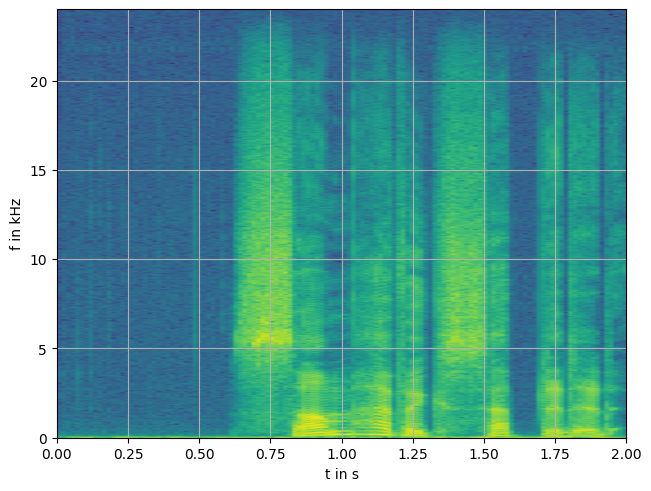

In [202]:
from IPython.display import Audio

sample_vals = all_sample_vals[:sample_rate * 2]
t_vals = np.linspace(0, 9, num=N)

f, t, Zxx = scipy.signal.stft(sample_vals, sample_rate, nperseg=sample_rate * 0.032)

MAX_AMPL = 0x8000
display(Audio(sample_vals / MAX_AMPL, rate=sample_rate, normalize=False))

plt.figure(constrained_layout=True)
plt.imshow(np.log(np.abs(Zxx)), aspect="auto", origin="lower", extent=(t[0], t[-1], f[0], f[-1]/1000))
plt.xlabel("t in s")
plt.ylabel("f in kHz")
plt.grid()

Q: _Is there a reason we are using such small segment?_ \
A: Window length is a tradeoff: The shorter the window is, the more accurate the point in time will be. The longer the window is, the more accurate the frequency values will be. The optimal window length depends on the content of the signal. 32 Hz is chosen so that the frequency can still be determined for a very low voice around 70 Hz, but individual phonemes are separated into different windows. [Source](https://ccrma.stanford.edu/~jos/st/Spectrogram_Speech.html)

Q: _Why do we need to have an overlap between segments?_ \
A: The window function will lead to the loss of some of the signal values unless we have overlap.

Q: _What can you observe in these plots?_ \
A: Vowels can be identified and distinguished from one another, as well as some consonants (\[s], \[m]).

Q: _What are the strong peaks that you can see for the speech parts?_ \
A: The visible activity in the 4.5–15 kHz range corresponds to the \[s] sound. The other visible areas correspond to vowels.